In [1]:
import numpy as np
import torch

In [2]:
from torch.autograd import Variable

In [3]:
import matplotlib.pyplot as plt

In [39]:
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F

In [5]:
train_dataset = dsets.MNIST(root="./data",train=True,transform=transforms.ToTensor(), download=True)

In [6]:
len(train_dataset)

60000

In [7]:
train_dataset[0][1]

5

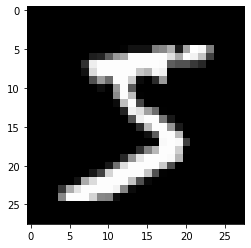

In [8]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')

In [9]:
test_dataset = dsets.MNIST(root="./data",train=False,transform=transforms.ToTensor())

In [10]:
len(test_dataset)

10000

In [32]:
batch_size = 100
num_epochs = 5

In [15]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,shuffle=False)

In [40]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
        
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        return out

In [41]:
input_dim = 28*28
hidden_dim = 100
output_dim = 10

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

# if torch.cuda.is_available():
#     model.cuda()

In [42]:
criterion = nn.CrossEntropyLoss()

In [43]:
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)
        
        optimizer.zero_grad()
        
        outputs = model(images)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        
        optimizer.step()
        
        iter += 1
        
        if iter % 500 == 0:
            correct = 0
            total = 0
            for images, labels in test_loader:
                images = images.view(-1, 28*28)
                
                outputs = model(images)
                
                _, predicted = torch.max(outputs.data, 1)
                
                total += labels.size(0)
                
                correct += (predicted == labels).sum()
                
            accuracy = 100 * correct / total
            
            print("Iteration {}. Loss {}. Accuracy: {}".format(iter, loss.item(), accuracy))

Iteration 500. Loss 0.2844070494174957. Accuracy: 91.22000122070312
Iteration 1000. Loss 0.24519765377044678. Accuracy: 92.81999969482422
Iteration 1500. Loss 0.32775264978408813. Accuracy: 93.93000030517578
Iteration 2000. Loss 0.22681915760040283. Accuracy: 94.44999694824219
Iteration 2500. Loss 0.16015809774398804. Accuracy: 95.19000244140625
Iteration 3000. Loss 0.12060629576444626. Accuracy: 95.66999816894531
Iteration 3500. Loss 0.13064590096473694. Accuracy: 96.0
Iteration 4000. Loss 0.16392825543880463. Accuracy: 96.0999984741211
Iteration 4500. Loss 0.07680615782737732. Accuracy: 96.44999694824219
Iteration 5000. Loss 0.1264520138502121. Accuracy: 96.69999694824219
Iteration 5500. Loss 0.042918939143419266. Accuracy: 97.0
Iteration 6000. Loss 0.03482829034328461. Accuracy: 97.06999969482422
Iteration 6500. Loss 0.16126957535743713. Accuracy: 97.0999984741211
Iteration 7000. Loss 0.014370397664606571. Accuracy: 97.25
Iteration 7500. Loss 0.08833148330450058. Accuracy: 97.410003